In [196]:
from pickle import load
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, brier_score_loss
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import pandas as pd
from random import choice
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [208]:
bries = {}
probs = {}
outliers = {}
i = choice(list(range(1,101)))
final = pd.DataFrame()

### Treinamento com GAMMA='AUTO'

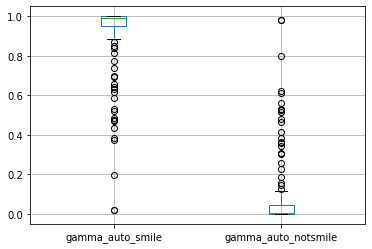

In [215]:
gamma = 'gamma_auto'
X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=1, probability=True))
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
mask = np.where(y_test == 'smile', True, False)
y_prob = y_prob[mask]
if gamma not in bries.keys():
    bries[gamma] = []
    probs[gamma] = []
    outliers[gamma] = []
bries[gamma].append(brier)
probs[gamma].append(y_prob[:, :1])
probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

#pegando outliers de sem sorriso
q1 = np.quantile(y_prob[:, :1], 0.25)
q3 = np.quantile(y_prob[:, :1], 0.75)
med = np.median(y_prob[:, :1])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

#pegando outlier sorriso
q1 = np.quantile(y_prob[:, 1:2], 0.25)
q3 = np.quantile(y_prob[:, 1:2], 0.75)
med = np.median(y_prob[:, 1:2])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

outliers[gamma] = {'notsmile': outliers_notsmile, 'smile': outliers_smile}

proba = proba.append(probanot)
final = final.append(probanot)
final = final.append(proba)
plot = proba.boxplot()

In [214]:
df = pd.read_csv('SMILEsmilesD_balanced_features/sigmas_frac0.5.csv')

### Treinamento sigest Median

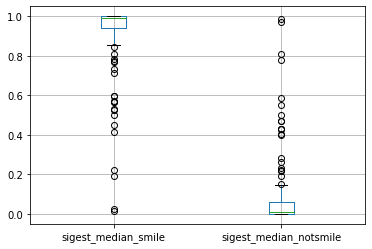

In [216]:
gamma = 'sigest_median'
X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
clf = make_pipeline(StandardScaler(), SVC(gamma=df['median'][i-1], kernel='rbf', C=1, probability=True))
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
mask = np.where(y_test == 'smile', True, False)
y_prob = y_prob[mask]
if gamma not in bries.keys():
    bries[gamma] = []
    probs[gamma] = []
    outliers[gamma] = []
bries[gamma].append(brier)
probs[gamma].append(y_prob[:, :1])
probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

#pegando outliers de sem sorriso
q1 = np.quantile(y_prob[:, :1], 0.25)
q3 = np.quantile(y_prob[:, :1], 0.75)
med = np.median(y_prob[:, :1])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

#pegando outlier sorriso
q1 = np.quantile(y_prob[:, 1:2], 0.25)
q3 = np.quantile(y_prob[:, 1:2], 0.75)
med = np.median(y_prob[:, 1:2])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

outliers[gamma] = {'notsmile': outliers_notsmile, 'smile': outliers_smile}

proba = proba.append(probanot)
final = final.append(probanot)
final = final.append(proba)
plot = proba.boxplot()

### Treinamento sigest 0.9 quantile

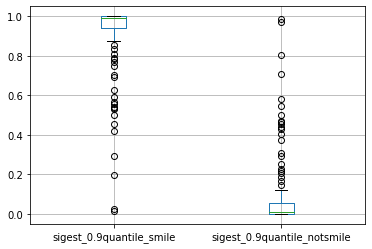

In [217]:
gamma = 'sigest_0.9quantile'
X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
clf = make_pipeline(StandardScaler(), SVC(gamma=df['09quantile'][i-1], kernel='rbf', C=1, probability=True))
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
mask = np.where(y_test == 'smile', True, False)
y_prob = y_prob[mask]
if gamma not in bries.keys():
    bries[gamma] = []
    probs[gamma] = []
    outliers[gamma] = []
bries[gamma].append(brier)
probs[gamma].append(y_prob[:, :1])
probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

#pegando outliers de sem sorriso
q1 = np.quantile(y_prob[:, :1], 0.25)
q3 = np.quantile(y_prob[:, :1], 0.75)
med = np.median(y_prob[:, :1])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

#pegando outlier sorriso
q1 = np.quantile(y_prob[:, 1:2], 0.25)
q3 = np.quantile(y_prob[:, 1:2], 0.75)
med = np.median(y_prob[:, 1:2])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

outliers[gamma] = {'notsmile': outliers_notsmile, 'smile': outliers_smile}

proba = proba.append(probanot)
final = final.append(probanot)
final = final.append(proba)
plot = proba.boxplot()

### Treinamento sigest media dos quantis

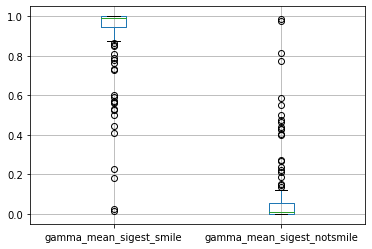

In [218]:
gamma = 'gamma_mean_sigest'
X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                    load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
gamma_mean_sigest = (df['09quantile'][i-1] + df['01quantile'][i-1]) / 2.
clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_mean_sigest, kernel='rbf', C=1, probability=True))
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
mask = np.where(y_test == 'smile', True, False)
y_prob = y_prob[mask]
if gamma not in bries.keys():
    bries[gamma] = []
    probs[gamma] = []
    outliers[gamma] = []
bries[gamma].append(brier)
probs[gamma].append(y_prob[:, :1])
probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

#pegando outliers de sem sorriso
q1 = np.quantile(y_prob[:, :1], 0.25)
q3 = np.quantile(y_prob[:, :1], 0.75)
med = np.median(y_prob[:, :1])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

#pegando outlier sorriso
q1 = np.quantile(y_prob[:, 1:2], 0.25)
q3 = np.quantile(y_prob[:, 1:2], 0.75)
med = np.median(y_prob[:, 1:2])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

outliers[gamma] = {'notsmile': outliers_notsmile, 'smile': outliers_smile}

proba = proba.append(probanot)
final = final.append(probanot)
final = final.append(proba)
plot = proba.boxplot()

### Treinamento gamma = 1/N

In [219]:
if False:
    gamma = 'gamma_N'
    X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    gamma_N = 1./(X_train.shape[0])
    clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_N, kernel='rbf', C=1, probability=True))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    brier = brier_score_loss(y_test, y_prob[:, 1:2], pos_label='smile')
    mask = np.where(y_test == 'smile', True, False)
    y_prob = y_prob[mask]
    if gamma not in bries.keys():
        bries[gamma] = []
        probs[gamma] = []
        outliers[gamma] = []
    bries[gamma].append(brier)
    probs[gamma].append(y_prob[:, :1])
    probanot = pd.DataFrame(y_prob[:, :1], columns=[gamma + '_notsmile']).fillna(value=0)
    proba = pd.DataFrame(y_prob[:, 1:2], columns=[gamma + '_smile']).fillna(value=0)

    #pegando outliers de sem sorriso
    q1 = np.quantile(y_prob[:, :1], 0.25)
    q3 = np.quantile(y_prob[:, :1], 0.75)
    med = np.median(y_prob[:, :1])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_notsmile = y_prob[:, :1][(y_prob[:, :1] <= lower_bound) | (y_prob[:, :1] >= upper_bound)]

    #pegando outlier sorriso
    q1 = np.quantile(y_prob[:, 1:2], 0.25)
    q3 = np.quantile(y_prob[:, 1:2], 0.75)
    med = np.median(y_prob[:, 1:2])
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers_smile = y_prob[:, 1:2][(y_prob[:, 1:2] <= lower_bound) | (y_prob[:, 1:2] >= upper_bound)]

    outliers[gamma] = {'notsmile': outliers_notsmile, 'smile': outliers_smile}

    proba = proba.append(probanot)
    final = final.append(probanot)
    final = final.append(proba)
    plot = proba.boxplot()

In [246]:
final = final.rename(columns={'gamma_N_smile': '1 / (Number of samples)',
                              'gamma_N_notsmile': '1 / (Number of samples)',
                              '1 / (Number of features)': 'auto',
                              'gamma_mean_sigest_smile': '(90%-quantile + 10%-quantile) / 2',
                              '(90%-quantile + 10%-quantile) / 2': 'quantile mean',
                              'gamma_mean_sigest_notsmile': '(90%-quantile + 10%-quantile) / 2',
                              'sigest_0.9quantile_smile': '90% quantile',
                              'sigest_0.9quantile_notsmile': '90% quantile',
                              'sigest_median_smile': 'median',
                              'sigest_median_notsmile': 'median',
                              'gamma_auto_smile': '1 / (Number of features)',
                              'gamma_auto_notsmile': '1 / (Number of features)'})

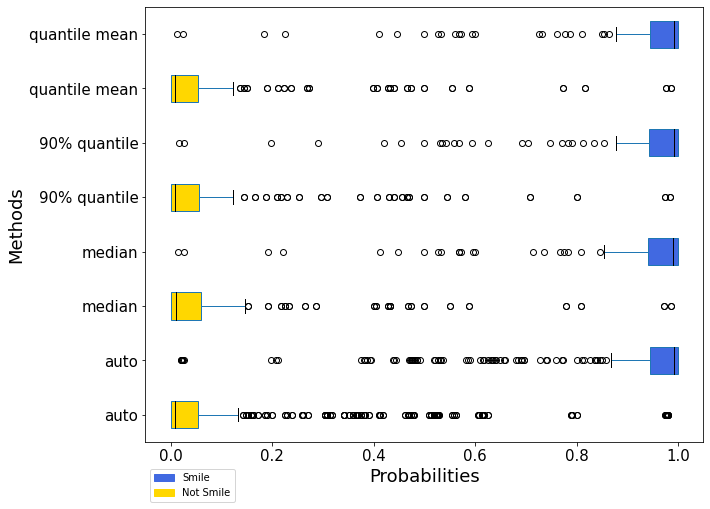

In [248]:
medianprops = dict(linewidth=1, color='k')

finalplot = final.boxplot(figsize=(10,8), grid=False, rot=0, return_type='dict', patch_artist = True,fontsize=15,
                          medianprops=medianprops, vert=False)
colors = ['gold', 'royalblue']
i = 0
for patch in finalplot['boxes']:
    patch.set(facecolor = colors[0] if i%2 == 0 else colors[1])
    i-=-1
plt.xlabel('Probabilities', fontsize=18)
plt.ylabel('Methods', fontsize=18)
plt.suptitle('')
red_patch = mpatches.Patch(color='royalblue', label='Smile')
blue_patch = mpatches.Patch(color='gold', label='Not Smile')
plt.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(0, -0.1))
plt.show()

In [222]:
for k, v in bries.items():
    brier_var = np.array(v).var()
    brier_mean = np.array(v).mean()
    print(f'Mean BRIER score for {k} is {brier_mean} with variation {brier_var}')

Mean BRIER score for gamma_auto is 0.02546617367799934 with variation 5.261223122327161e-08
Mean BRIER score for sigest_median is 0.025029443465623906 with variation 0.0
Mean BRIER score for sigest_0.9quantile is 0.024543678640268376 with variation 0.0
Mean BRIER score for gamma_mean_sigest is 0.02477553872283818 with variation 0.0


In [232]:
for k, v in outliers.items():
    outsmile = len(v['smile'])
    outnotsmile = len(v['notsmile'])
    print(f'{k} had {outsmile} outliers for smile and {outnotsmile} for notsmile')

gamma_auto had 25 outliers for smile and 25 for notsmile
sigest_median had 21 outliers for smile and 21 for notsmile
sigest_0.9quantile had 23 outliers for smile and 23 for notsmile
gamma_mean_sigest had 23 outliers for smile and 23 for notsmile
